In [1]:
import pprint
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score, jaccard_score
from sklearn.metrics import plot_confusion_matrix
from autoimpute.imputations import SingleImputer

warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
seed = 42 #Reproduce results
evaluation = {}

In [3]:
df = pd.read_csv('pid.csv')

In [4]:
df.head()

,A,B,C,D,E,F,G,H,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
train, test = train_test_split(df, train_size=0.75, random_state=seed)

In [6]:
target = 'Label'
explanatory = [c for c in df.columns if c != target]

train_X = train[explanatory]
train_y = train[target]
test_X = test[explanatory]
test_y = test[target]

In [7]:
scaler = StandardScaler().fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

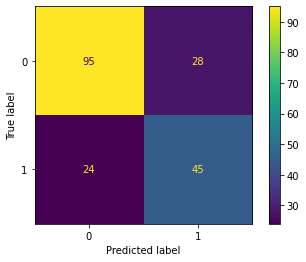

In [8]:
#1 - Logistic Regression Classifier

clf = LogisticRegression(random_state=seed).fit(train_X, train_y)
lr_pred = clf.predict(test_X)
evaluation['Logistic Regression Classifier'] = {'Balanced Accuracy:': round(balanced_accuracy_score(test_y, lr_pred)*100, 2),
                                                'Jaccard:': round(jaccard_score(test_y, lr_pred)*100, 2)}

plot_confusion_matrix(clf, test_X, test_y)

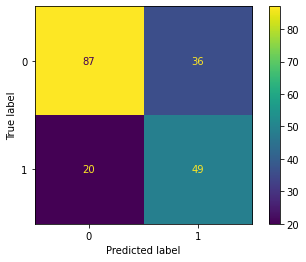

In [9]:
#2 - Decision Tree Classifier

clf = DecisionTreeClassifier(random_state=seed).fit(train_X, train_y)
dt_pred = clf.predict(test_X)
evaluation['Decision Tree Classifier'] = {'Balanced Accuracy:': round(balanced_accuracy_score(test_y, dt_pred)*100, 2),
                                                'Jaccard:': round(jaccard_score(test_y, dt_pred)*100, 2)}

plot_confusion_matrix(clf, test_X, test_y)

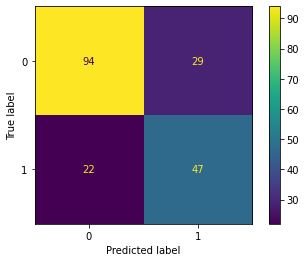

In [10]:
#3 - Gaussian Naive Bayes Classifier

clf = GaussianNB().fit(train_X, train_y)
mlp_pred = clf.predict(test_X)
evaluation['Multi-Layer Perceptron Classifier'] = {'Balanced Accuracy:': round(balanced_accuracy_score(test_y, mlp_pred)*100, 2),
                                                'Jaccard:': round(jaccard_score(test_y, mlp_pred)*100, 2)}

plot_confusion_matrix(clf, test_X, test_y)

In [11]:
pprint.pprint(evaluation)

{'Decision Tree Classifier': {'Balanced Accuracy:': 70.87, 'Jaccard:': 46.67},
 'Logistic Regression Classifier': {'Balanced Accuracy:': 71.23,
                                    'Jaccard:': 46.39},
 'Multi-Layer Perceptron Classifier': {'Balanced Accuracy:': 72.27,
                                       'Jaccard:': 47.96}}


In [12]:
df[['C', 'D', 'E', 'F']] = df[['C', 'D', 'E', 'F']].replace(0, np.nan)

In [13]:
df.head()

,A,B,C,D,E,F,G,H,Label
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
df_imputed = SingleImputer(strategy='stochastic', seed=seed).fit_transform(df)
df_imputed.head()

,A,B,C,D,E,F,G,H,Label
0,6,148,72.0,35.00000,-88.928634,33.6,0.627,50,1
1,1,85,66.0,29.00000,-25.451799,26.6,0.351,31,0
2,8,183,64.0,12.16641,230.638704,23.3,0.672,32,1
3,1,89,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.00000,168.000000,43.1,2.288,33,1


In [15]:
train, test = train_test_split(df_imputed, train_size=0.75, random_state=seed, stratify=df_imputed[target])
train_X = train[explanatory]
train_y = train[target]
test_X = test[explanatory]
test_y = test[target]

In [16]:
scaler = StandardScaler().fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [17]:
evaluation = {}

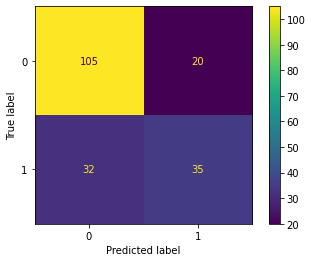

In [18]:
#1 - Logistic Regression Classifier

clf = LogisticRegression(random_state=seed).fit(train_X, train_y)
lr_pred = clf.predict(test_X)
evaluation['Logistic Regression Classifier'] = {'Balanced Accuracy:': round(balanced_accuracy_score(test_y, lr_pred)*100, 2),
                                                'Jaccard:': round(jaccard_score(test_y, lr_pred)*100, 2)}

plot_confusion_matrix(clf, test_X, test_y)

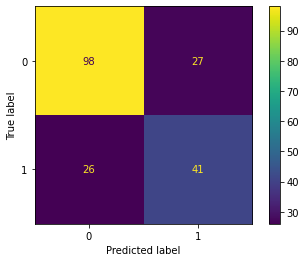

In [19]:
#2 - Decision Tree Classifier

clf = DecisionTreeClassifier(random_state=seed).fit(train_X, train_y)
dt_pred = clf.predict(test_X)
evaluation['Decision Tree Classifier'] = {'Balanced Accuracy:': round(balanced_accuracy_score(test_y, dt_pred)*100, 2),
                                                'Jaccard:': round(jaccard_score(test_y, dt_pred)*100, 2)}

plot_confusion_matrix(clf, test_X, test_y)

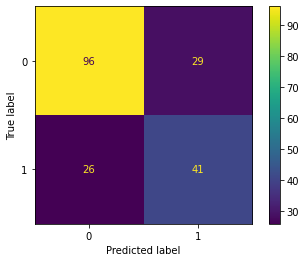

In [20]:
#3 - Gaussian Naive Bayes Classifier

clf = GaussianNB().fit(train_X, train_y)
mlp_pred = clf.predict(test_X)
evaluation['Multi-Layer Perceptron Classifier'] = {'Balanced Accuracy:': round(balanced_accuracy_score(test_y, mlp_pred)*100, 2),
                                                'Jaccard:': round(jaccard_score(test_y, mlp_pred)*100, 2)}

plot_confusion_matrix(clf, test_X, test_y)

In [21]:
pprint.pprint(evaluation)

{'Decision Tree Classifier': {'Balanced Accuracy:': 69.8, 'Jaccard:': 43.62},
 'Logistic Regression Classifier': {'Balanced Accuracy:': 68.12,
                                    'Jaccard:': 40.23},
 'Multi-Layer Perceptron Classifier': {'Balanced Accuracy:': 69.0,
                                       'Jaccard:': 42.71}}
